<h1>Part 1</h1>

In [403]:
# Imports
import networkx as nx
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
from ndlib.models import epidemics
import ndlib.models.ModelConfig as config
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


<h2>Task A</h2>

In [5]:
# Small Network
small_df = pd.read_csv("PROPERTIES.csv")
# Medium Network
medium_df = pd.read_csv("ADMINISTRATORS.csv")
# Large Network
large_df = pd.read_csv("PROJECT_CHAT.csv")

In [6]:
# Two users have a social connection iff they both have made a comment in the same thread and in the same page
small_groupByPageThread = small_df.groupby(['page_name', 'thread_subject'])
G_small = nx.Graph()

medium_groupByPageThread = medium_df.groupby(['page_name', 'thread_subject'])
G_medium = nx.Graph()

large_groupByPageThread = large_df.groupby(['page_name', 'thread_subject'])
G_large = nx.Graph()

In [7]:
def edgeCreation(graph, grouping, name="Graph"):
    for _, group in grouping:
        users = group['username'].unique()
        possibleEdges = itertools.combinations(users, 2)
        for i, j in possibleEdges:
            if graph.has_edge(i, j):
                graph[i][j]['weight'] += 1
            else:
                graph.add_edge(i, j, weight = 1)

    noOfNodes = graph.number_of_nodes()
    noOfEdges = graph.number_of_edges()

    print(f"In graph '{name}', the number of nodes which represent Users is {noOfNodes}")
    print(f"In graph '{name}', the number of edges which represent Connections is {noOfEdges} \n")

In [8]:
edgeCreation(G_small, small_groupByPageThread, name = "G_small")
edgeCreation(G_medium, medium_groupByPageThread, name = "G_medium")
edgeCreation(G_large, large_groupByPageThread, name = "G_large")

In graph 'G_small', the number of nodes which represent Users is 1657
In graph 'G_small', the number of edges which represent Connections is 9198 

In graph 'G_medium', the number of nodes which represent Users is 2165
In graph 'G_medium', the number of edges which represent Connections is 11915 

In graph 'G_large', the number of nodes which represent Users is 3941
In graph 'G_large', the number of edges which represent Connections is 40255 



<h2>Task B</h2>

In [9]:
def graphMetrics(graph, name="Graph"):
    
    print(f"Graph '{name}': ")
    
    noOfNodes = graph.number_of_nodes()
    print(f"The number of nodes is {noOfNodes}")
    
    noOfEdges = graph.number_of_edges()
    print(f"The number of edges is {noOfEdges}")
    
    noOfConnectedComponents = nx.number_connected_components(graph)
    print(f"The number of connected components is {noOfConnectedComponents}")
    
    averageDegree = np.mean([deg for _, deg in graph.degree()])
    print(f"The average degree is {averageDegree}")
    
    clusteringCoefficient = nx.average_clustering(graph)
    print(f"The clustering coefficient is {clusteringCoefficient}")
    
    try:  # attempt to compute the diameter of the graph
        diam = nx.diameter(graph)
        print(f"The diameter is {diam}")
    except:  # an error has occurred
        print("ERROR: Could not compute the diameter of the graph.")
        
    largestConnectedComponent = max(nx.connected_components(graph), key=len)
    graph_largestConnectedComponent = graph.subgraph(largestConnectedComponent)
    noOfNodesLargest = graph_largestConnectedComponent.number_of_nodes()
    noOfEdgesLargest = graph_largestConnectedComponent.number_of_edges()
    print(f"The largest connected component has {noOfNodesLargest} nodes and {noOfEdgesLargest} edges")
    
    averageShortestPathInLargestComponent = nx.average_shortest_path_length(graph_largestConnectedComponent)
    print(f"The average shortest path in the largest connected component is {averageShortestPathInLargestComponent}")

    try:  # attempt to compute the diameter of the graph
        diam = nx.diameter(graph_largestConnectedComponent)
        print(f"The diameter of the largest connected component is {diam}")
    except:  # an error has occurred
        print("ERROR: Could not compute the diameter of the largest connected component.")
    
    print("\n")

In [10]:
graphMetrics(G_small, name = "G_small")
graphMetrics(G_medium, name = "G_medium")
graphMetrics(G_large, name = "G_large")

Graph 'G_small': 
The number of nodes is 1657
The number of edges is 9198
The number of connected components is 19
The average degree is 11.101991550995775
The clustering coefficient is 0.5514779450908336
ERROR: Could not compute the diameter of the graph.
The largest connected component has 1618 nodes and 9174 edges
The average shortest path in the largest connected component is 2.900909908856227
The diameter of the largest connected component is 7


Graph 'G_medium': 
The number of nodes is 2165
The number of edges is 11915
The number of connected components is 4
The average degree is 11.006928406466512
The clustering coefficient is 0.646152245519586
ERROR: Could not compute the diameter of the graph.
The largest connected component has 2159 nodes and 11912 edges
The average shortest path in the largest connected component is 2.794136749370375
The diameter of the largest connected component is 6


Graph 'G_large': 
The number of nodes is 3941
The number of edges is 40255
The number o

In [ ]:
def degreeHistogram(graph, ax, name="Graph"):
    degreeSequence = [d for n, d in graph.degree()]
    averageDegree =sum(degreeSequence)/len(degreeSequence)
    print(f"The average degree is {averageDegree}")

    degreeCount = collections.Counter(degreeSequence)
    deg, cnt = zip(*degreeCount.items())

    ax.bar(deg, cnt, width=0.80, color="blue", edgecolor='black')
    ax.set_title(f"Degree Histogram for '{name}'")
    ax.set_ylabel("Count")
    ax.set_xlabel("Degree")
    ax.set_xlim(0, 50)

The average degree is 11.101991550995775
The average degree is 11.006928406466512
The average degree is 20.428825171276326


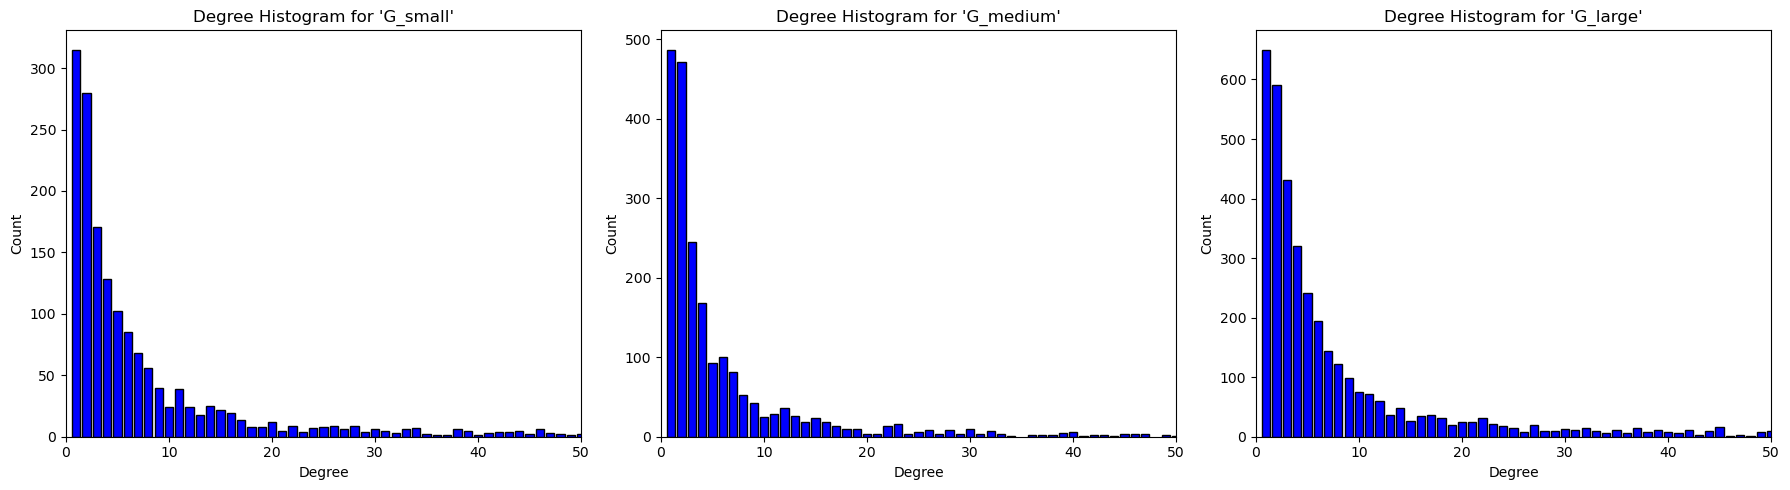

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each graph’s degree distribution
degreeHistogram(G_small, axes[0], name = "G_small")
degreeHistogram(G_medium, axes[1], name = "G_medium")
degreeHistogram(G_large, axes[2], name = "G_large")

plt.tight_layout()
plt.show()

In [ ]:
def randomNetworkSetup(graph):
    randomNoOfGraphNodes = graph.number_of_nodes()
    randomNoOfGraphEdges = graph.number_of_edges()
    
    # Total number of possible edges in an undirected graph
    maxPossibleEdges = randomNoOfGraphNodes * (randomNoOfGraphNodes - 1) / 2

    # Probability needed to get approximately m edges
    probability = randomNoOfGraphEdges / maxPossibleEdges  

    G_random = nx.erdos_renyi_graph(n = randomNoOfGraphNodes, p = probability, seed = 42)
    
    return G_random

In [14]:
G_random_small = randomNetworkSetup(G_small)
graphMetrics(G_random_small, name = "G_random_small")

G_random_medium = randomNetworkSetup(G_medium)
graphMetrics(G_random_medium, name = "G_random_medium")

G_random_large = randomNetworkSetup(G_large)
graphMetrics(G_random_large, name = "G_random_large")

Graph 'G_random_small': 
The number of nodes is 1657
The number of edges is 9160
The number of connected components is 1
The average degree is 11.056125528062765
The clustering coefficient is 0.00701901128849566
The diameter is 5
The largest connected component has 1657 nodes and 9160 edges
The average shortest path in the largest connected component is 3.354379313059222
The diameter of the largest connected component is 5


Graph 'G_random_medium': 
The number of nodes is 2165
The number of edges is 11944
The number of connected components is 1
The average degree is 11.033718244803696
The clustering coefficient is 0.004940446381040122
The diameter is 6
The largest connected component has 2165 nodes and 11944 edges
The average shortest path in the largest connected component is 3.4709655799498833
The diameter of the largest connected component is 6


Graph 'G_random_large': 
The number of nodes is 3941
The number of edges is 40033
The number of connected components is 1
The average deg

The average degree is 11.056125528062765
The average degree is 11.033718244803696
The average degree is 20.316163410301954


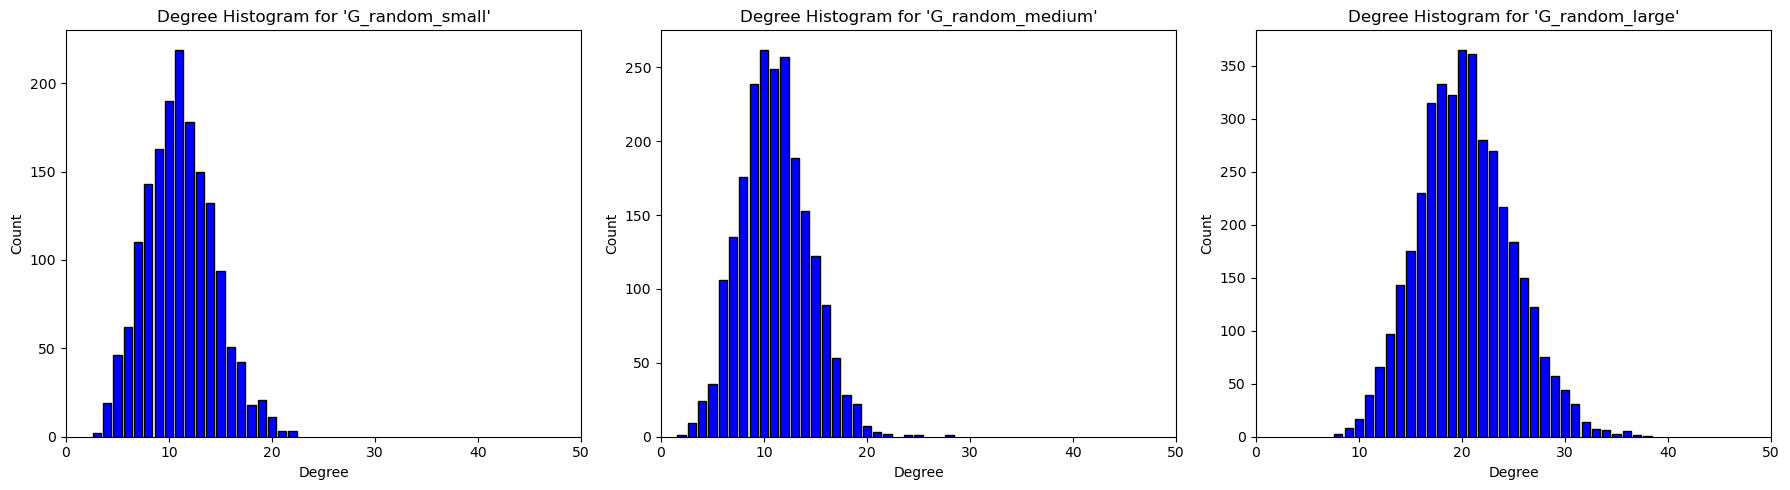

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each graph’s degree distribution
degreeHistogram(G_random_small, axes[0], name = "G_random_small")
degreeHistogram(G_random_medium, axes[1], name = "G_random_medium")
degreeHistogram(G_random_large, axes[2], name = "G_random_large")

plt.tight_layout()
plt.show()

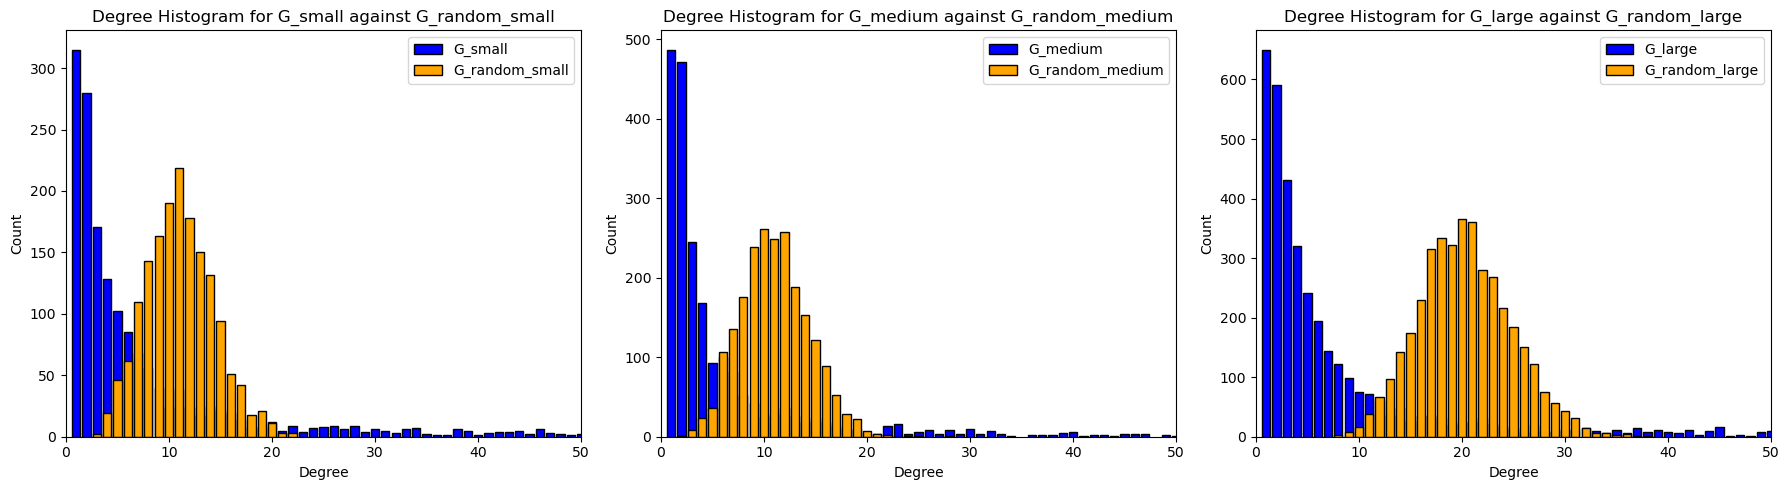

In [ ]:
def overlappingDegreeHistogram(regularNetwork, randoNetwork, ax, alias1 = 'Graph', alias2 = 'Graph',):
    
    degreeSequenceRegular = [d for n, d in regularNetwork.degree()]
    degreeCountRegular = collections.Counter(degreeSequenceRegular)
    degRegular, cntRegular = zip(*degreeCountRegular.items())
    
    degreeSequenceRandom = [d for n, d in randoNetwork.degree()]
    degreeCountRandom = collections.Counter(degreeSequenceRandom)
    degRandom, cntRandom = zip(*degreeCountRandom.items())

    ax.bar(degRegular, cntRegular, width=0.80, color="blue", edgecolor='black', label=f"{alias1}")
    ax.bar(degRandom, cntRandom, width=0.80, color="orange", edgecolor='black', label=f"{alias2}")
        
    ax.set_title(f"Degree Histogram for {alias1} against {alias2}")
    ax.set_ylabel("Count")
    ax.set_xlabel("Degree")
    ax.set_xlim(0, 50)
    ax.legend()
    
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

overlappingDegreeHistogram(G_small, G_random_small, axes[0], alias1 = 'G_small', alias2 = 'G_random_small')
overlappingDegreeHistogram(G_medium, G_random_medium, axes[1], alias1 = 'G_medium', alias2 = 'G_random_medium')
overlappingDegreeHistogram(G_large, G_random_large, axes[2], alias1 = 'G_large', alias2 = 'G_random_large')

plt.tight_layout()
plt.show()

<h2>Task C</h2>

In [66]:
def randomlyChooseTwoEditors(graph):
    editorNodes = list(graph.nodes())
    
    chosenEditorNode1 = random.choice(editorNodes)
    chosenEditorNode2 = random.choice(editorNodes)
    
    print(f"The chosen editor nodes are {chosenEditorNode1} and {chosenEditorNode2}.")
    
    return chosenEditorNode1, chosenEditorNode2

In [173]:
def editorMetrics(graph, name='Graph'):
    
    print(f"Graph '{name}': ")

    editor1, editor2 = randomlyChooseTwoEditors(graph)
    try:
        shortestPathLength = nx.shortest_path_length(graph, source = editor1, target = editor2)
        print(f"The shortest path length between {editor1} and {editor2} is {shortestPathLength}.")
    except nx.NetworkXNoPath:
        print(f"There is no path between {editor1} and {editor2}.")
        
    neighboursOfEditor1 = list(graph.neighbors(editor1))
    print(f"The neighbors of {editor1} are {neighboursOfEditor1}.")
    neighboursOfEditor2 = list(graph.neighbors(editor2))
    print(f"The neighbors of {editor2} are {neighboursOfEditor2}.")
    
    mutualNeighbors = list(nx.common_neighbors(graph, editor1, editor2))
    if len(mutualNeighbors) == 0:
        print(f"There are no mutual neighbors of {editor1} and {editor2}.")
    else:
        print(f"The mutual neighbors of {editor1} and {editor2} are {mutualNeighbors}.")
        
    localNeighborhood = set(neighboursOfEditor1 + neighboursOfEditor2 + [editor1, editor2])
    localNeighborhoodSubgraph = graph.subgraph(localNeighborhood)
    
    averageDegree = np.mean([deg for _, deg in localNeighborhoodSubgraph.degree()])
    print(f"The average degree is {averageDegree}")
    
    clusteringCoefficient = nx.average_clustering(localNeighborhoodSubgraph)
    print(f"The clustering coefficient is {clusteringCoefficient}")
    
    print("\n")


In [174]:
editorMetrics(G_small, name='G_small')
editorMetrics(G_medium, name='G_medium')
editorMetrics(G_large, name='G_large')

Graph 'G_small': 
The chosen editor nodes are Tommes and So9q.
The shortest path length between Tommes and So9q is 3.
The neighbors of Tommes are ['Valentina.Anitnelav'].
The neighbors of So9q are ['Matthias Winkelmann', 'Infovarius', 'Jura1', 'ArthurPSmith', '83.250.212.175', 'Fnielsen', 'Pigsonthewing', 'Bovlb', 'Wostr', 'ChristianKl', 'Anonymous_username_277', 'Matěj Suchánek', 'Vahurzpu', 'Andrew Gray', 'Tom Morris', 'Ainali', 'Nikki', 'Dhx1', 'Ash Crow', 'Multichill', 'VIGNERON', 'Uziel302', 'ThelmOSO', 'Lepticed7', 'Lucas Werkmeister', 'Lexicolover', 'Shisma', 'Yurik', 'Adrijaned', 'Jsamwrites'].
There are no mutual neighbors of Tommes and So9q.
The average degree is 12.666666666666666
The clustering coefficient is 0.7974469363596085


Graph 'G_medium': 
The chosen editor nodes are Theopolisme and Fralambert.
The shortest path length between Theopolisme and Fralambert is 2.
The neighbors of Theopolisme are ['Happy5214', 'Ajraddatz', 'Rschen7754', 'Lukas²³', 'Arkanosis', 'Lavallen

In [408]:
def simulateEpidemicModel(graph, name='Graph'):
    
    editor1, editor2 = randomlyChooseTwoEditors(graph)
    
    print(f"Graph '{name}': ")

    model_a = epidemics.SIModel(graph)
    
    config_a = config.Configuration()
    config_a.add_model_parameter('beta', 0.1)
    config_a.add_model_initial_configuration("Infected", editor1)
    config_a.add_model_initial_configuration("Infected", editor2)
    
    model_a.set_initial_status(config_a) 
    
    iterations_a = model_a.iteration_bunch(50)  
    trends_a = model_a.build_trends(iterations_a) 
    
    viz = DiffusionTrend(model_a, trends_a)
    fig = viz.plot()

The chosen editor nodes are Bjung and ·Ɔ.
Graph 'G_small': 


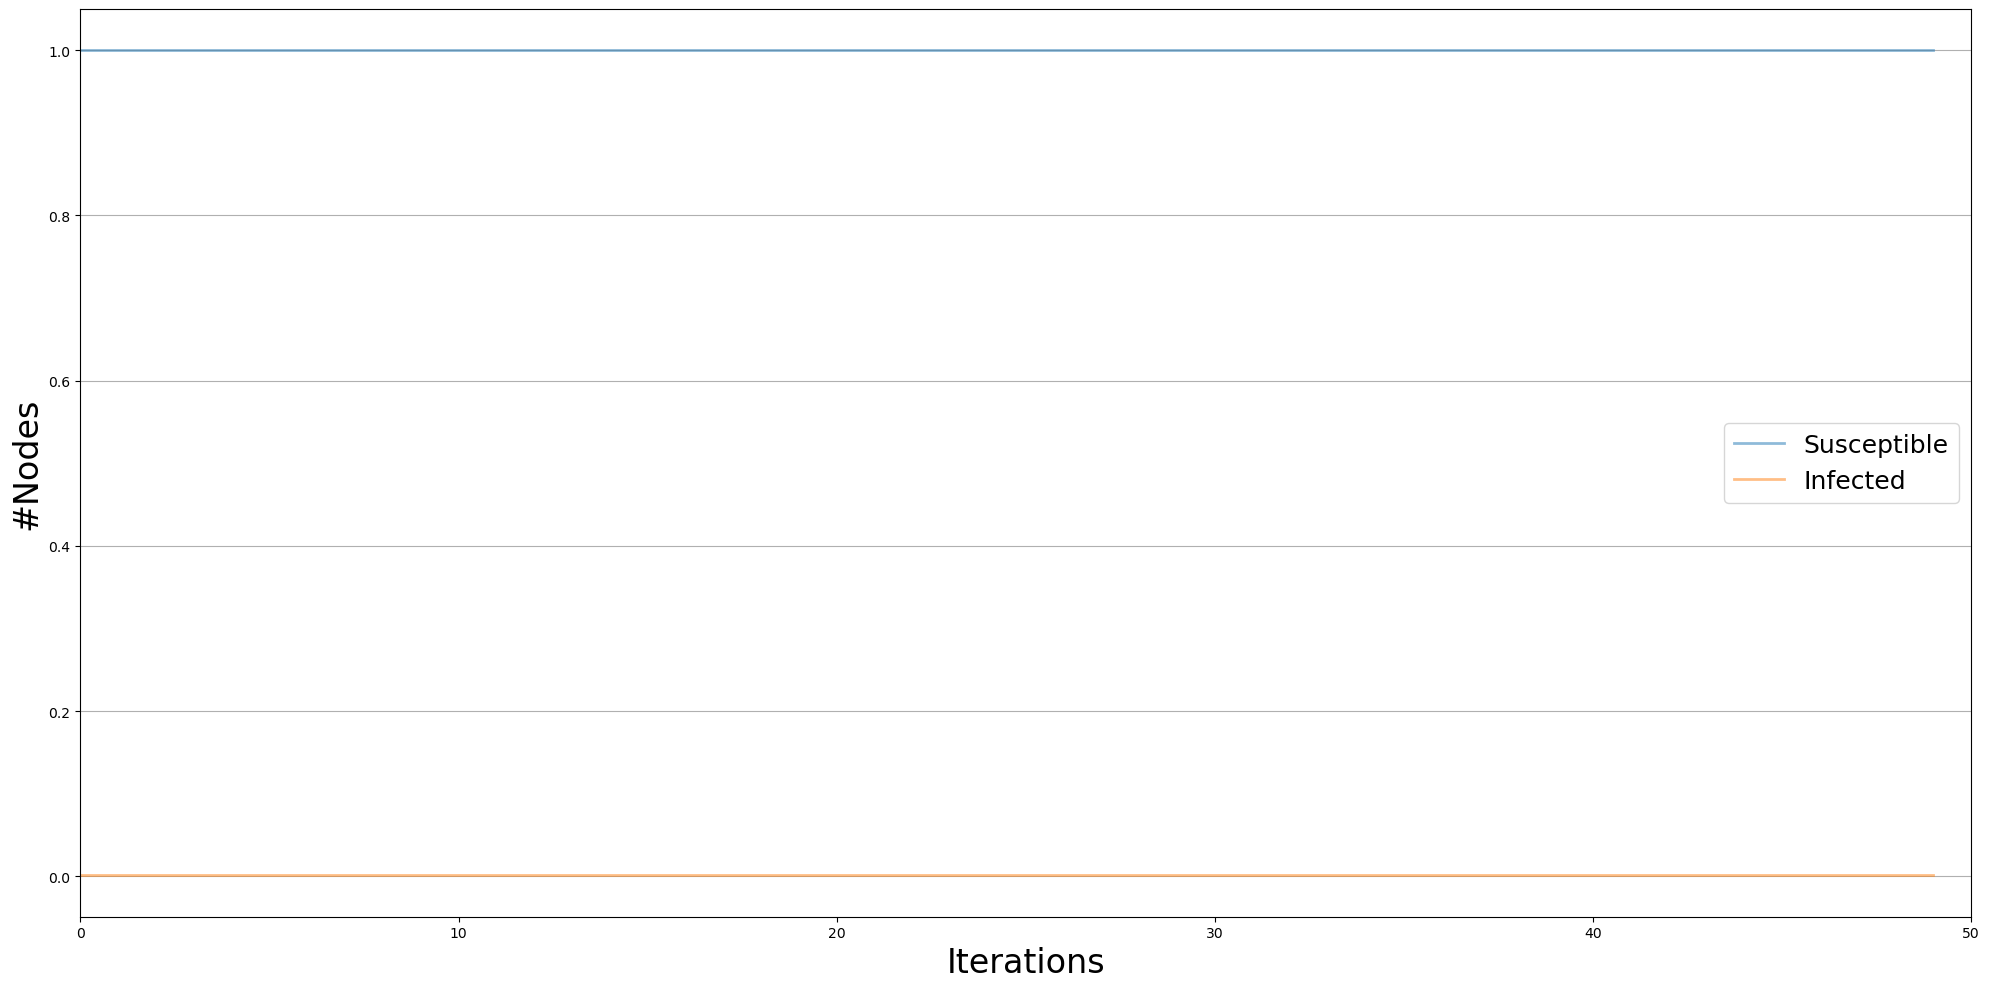

The chosen editor nodes are Numbermaniac and TBloemink.
Graph 'G_medium': 


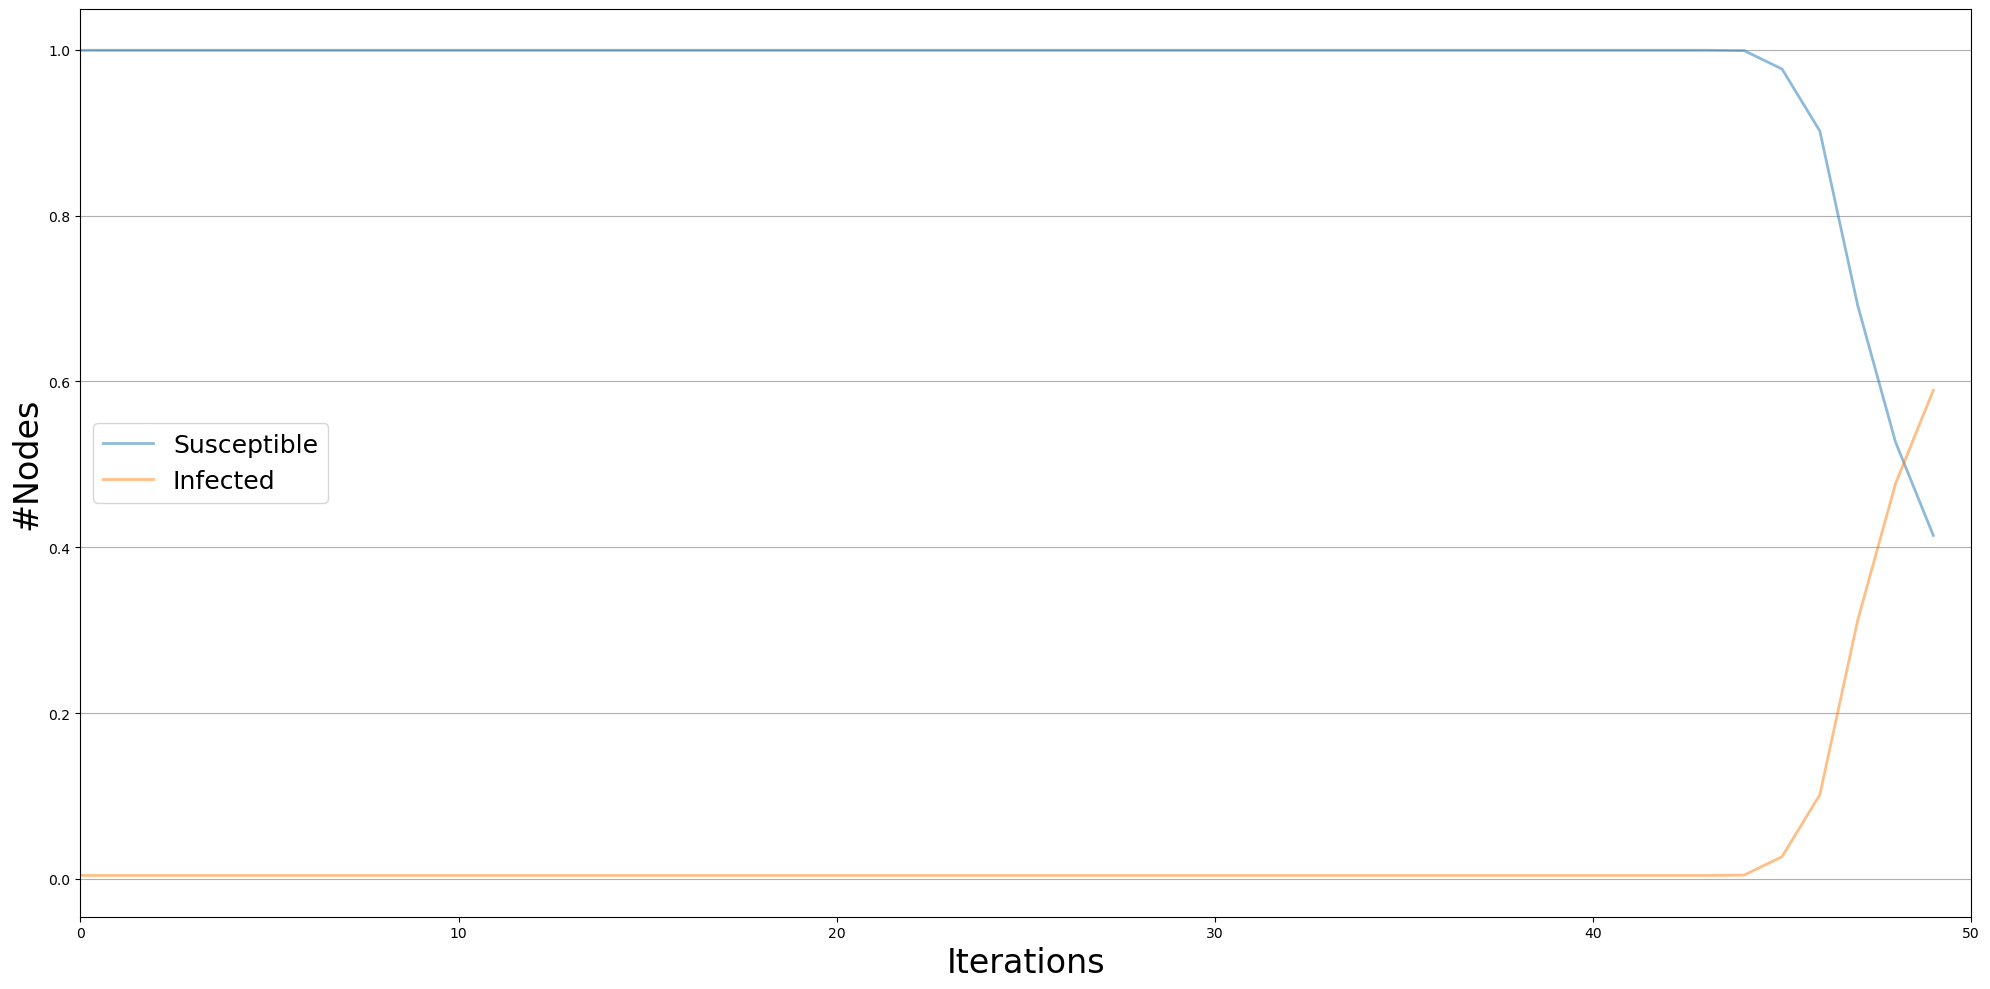

The chosen editor nodes are ChoG and Exilexi.
Graph 'G_large': 


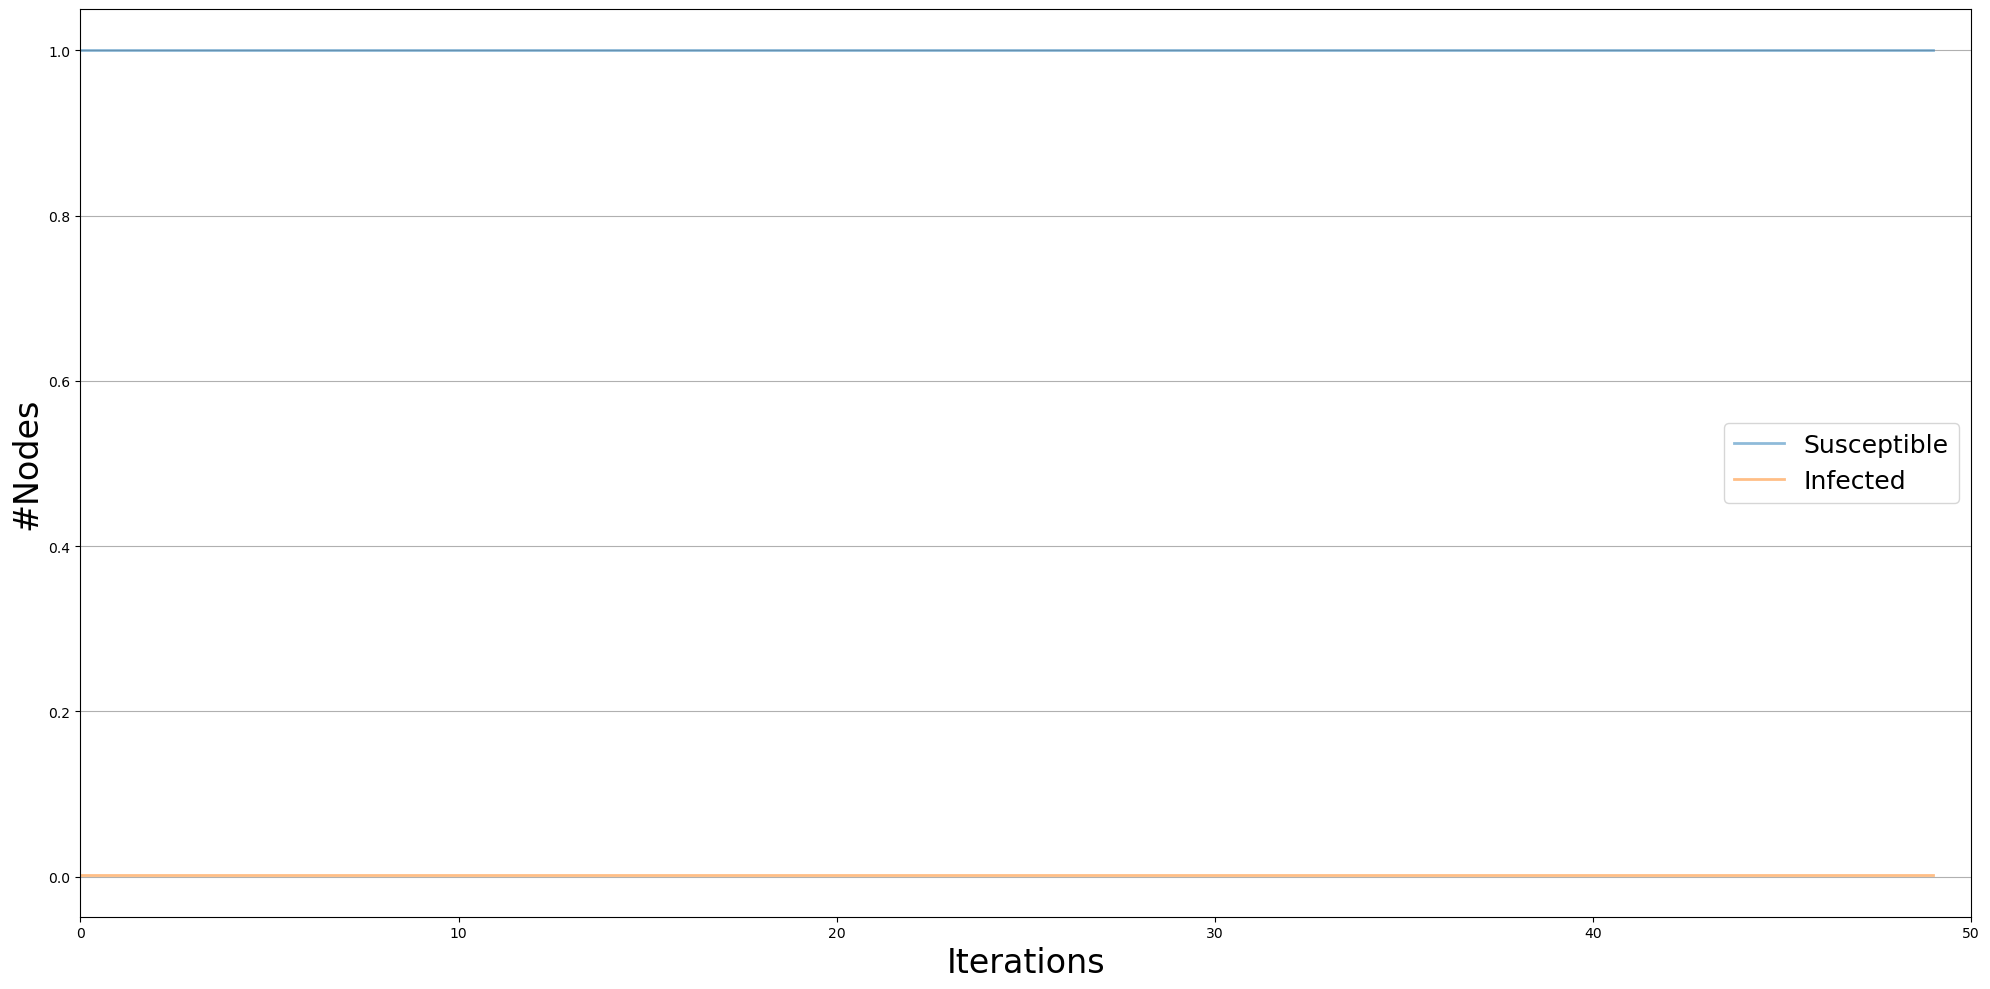

In [415]:
simulateEpidemicModel(G_small, name='G_small')
simulateEpidemicModel(G_medium, name='G_medium')
simulateEpidemicModel(G_large, name='G_large')

In [ ]:
def priorityList(graph, name='Graph'):
    
    priorityListWithWeights = {}
    editor1, editor2 = randomlyChooseTwoEditors(graph)
    editors = [editor1, editor2]
    
    for i in editors:
        neighbours = list(graph.neighbors(i))
        for j in neighbours:
            if j not in editors:
                weight = graph.get_edge_data(i, j).get('weight', 1)
                if j in priorityListWithWeights:
                    priorityListWithWeights[j] += weight
                else:
                    priorityListWithWeights[j] = weight
                        
                        
    for i in editors:
        shortestPaths = nx.single_source_shortest_path_length(graph, i, cutoff = 3)
        for j, distance in shortestPaths.items():
            if j not in editors:
                weight = 4 - distance  # distance 1 -> +3, distance 2 -> +2, distance 3 -> +1
                if j in priorityListWithWeights:
                    priorityListWithWeights[j] += weight
                else:
                    priorityListWithWeights[j] = weight
                

    sortedPriorityList = (sorted(priorityListWithWeights.items(), key=lambda item: item[1], reverse=True))
    
    print(f"Graph: {name}")
    i = 1
    for (editor, weight) in sortedPriorityList[:15]:
        print(f"{i}: {editor} with weight {weight}")
        i += 1
    print("\n")

    return sortedPriorityList, editor1, editor2

In [349]:
priorityList(G_small, name="G_small")
priorityList(G_medium, name="G_medium")
priorityList(G_large, name="G_large")

The chosen editor nodes are C960657 and Bargioni.
Graph: G_small
1: Epìdosis with weight 12
2: Jura1 with weight 10
3: Sotho Tal Ker with weight 8
4: MrProperLawAndOrder with weight 8
5: Multichill with weight 6
6: Thadguidry with weight 6
7: Scs with weight 6
8: Edoderoo with weight 6
9: Moebeus with weight 6
10: Quakewoody with weight 6
11: Andrew Gray with weight 6
12: ArthurPSmith with weight 6
13: Jklamo with weight 6
14: Vladimir Alexiev with weight 6
15: Onwa with weight 5


The chosen editor nodes are Akerbeltz and Sameboat.
Graph: G_medium
1: Matěj Suchánek with weight 7
2: Sjoerddebruin with weight 6
3: Nikki with weight 6
4: Stryn with weight 6
5: Pamputt with weight 6
6: MisterSynergy with weight 6
7: Innocent bystander with weight 6
8: Lymantria with weight 6
9: Oravrattas with weight 5
10: SCP-2000 with weight 5
11: Jasper Deng with weight 4
12: Ajraddatz with weight 4
13: AmaryllisGardener with weight 4
14: Ymblanter with weight 4
15: GZWDer with weight 4


The chosen ed

[('Jura1', 7),
 ('Bene*', 7),
 ('Infovarius', 6),
 ('ValterVB', 6),
 ('Lydia Pintscher (WMDE)', 6),
 ('Matěj Suchánek', 6),
 ('Gamaliel', 6),
 ('Gymnicus', 6),
 ('Tagishsimon', 6),
 ('MSGJ', 6),
 ('Mbch331', 6),
 ('Jared Preston', 6),
 ('Innocent bystander', 6),
 ('TomT0m', 6),
 ('Eldizzino', 6),
 ('Hsarrazin', 6),
 ('StevenJ81', 6),
 ('Sjoerddebruin', 6),
 ('Yair rand', 6),
 ('Edoderoo', 6),
 ('Izno', 6),
 ('Paweł Ziemian', 6),
 ('Jc3s5h', 6),
 ('Lopezsuarez', 4),
 ('Mzajac', 4),
 ('Emu', 4),
 ('Karl Oblique', 4),
 ('Multichill', 4),
 ('Pelagic', 4),
 ('178.237.94.235', 4),
 ('Jeblad', 4),
 ('Sixsi6ma', 4),
 ('Ymblanter', 4),
 ('SimsKoarl', 4),
 ('Michgrig', 4),
 ('Yamaha5', 4),
 ('Vogone', 4),
 ('Hahc21', 4),
 ('Nihonjoe', 4),
 ('PiRSquared17', 4),
 ('Shawn in Montreal', 4),
 ('Zolo', 4),
 ('Svebert', 4),
 ('Hurricanefan24', 4),
 ('FrigidNinja', 4),
 ('Kolja21', 4),
 ('Nightwish62', 4),
 ('Delusion23', 4),
 ('Saehrimnir', 4),
 ('Stryn', 4),
 ('Soulkeeper', 4),
 ('Ricordisamoa', 4),
 

In [ ]:
def visualizeShortestPathPriorityList(graph):
    sortedPriorityList, editor1, editor2 = priorityList(graph)
    
    editors = [editor1, editor2]
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    
    index = 0
    for i in editors:
        
        ax = axes[index]
        index += 1
        
        distanceEditor = nx.single_source_shortest_path_length(graph, i, cutoff = 3)
        
        topEditors = []
        for editor, _ in sortedPriorityList[:15]:
            topEditors.append(editor)
        visible_nodes = list(topEditors) + [i]
        
        subgraph = graph.subgraph(visible_nodes)
        
        color_map = []
        for node in subgraph.nodes():
            if node == i:
                color_map.append("red")
            elif node in distanceEditor:
                dist = distanceEditor[node]
                if dist == 1:
                    color_map.append("orange")
                elif dist == 2:
                    color_map.append("yellow")
                elif dist == 3:
                    color_map.append("green")
            else:
                    color_map.append("grey")


        pos = nx.spring_layout(subgraph, seed=42)
        nx.draw_networkx_nodes(subgraph, pos, node_color=color_map, node_size=500, ax=ax)
        nx.draw_networkx_edges(subgraph, pos, ax=ax)
        nx.draw_networkx_labels(subgraph, pos, font_size=10, ax=ax)

        ax.set_title(f"Priority Paths Around '{i}'")
        ax.axis('on')

    plt.suptitle("Priority Paths for Suspected Editors")
    plt.tight_layout()
    plt.show()


The chosen editor nodes are Joao4669 and Floscher.
Graph: Graph
1: Jura1 with weight 10
2: Alexmar983 with weight 6
3: Pintoch with weight 6
4: MisterSynergy with weight 6
5: Hufkratzer with weight 6
6: Kolja21 with weight 6
7: Sergey kudryavtsev with weight 6
8: -- with weight 6
9: Pasleim with weight 6
10: Queryzo with weight 6
11: Kolossos with weight 5
12: Markus Krötzsch with weight 5
13: Arctic.gnome with weight 4
14: billinghurst with weight 4
15: UWashPrincipalCataloger with weight 4




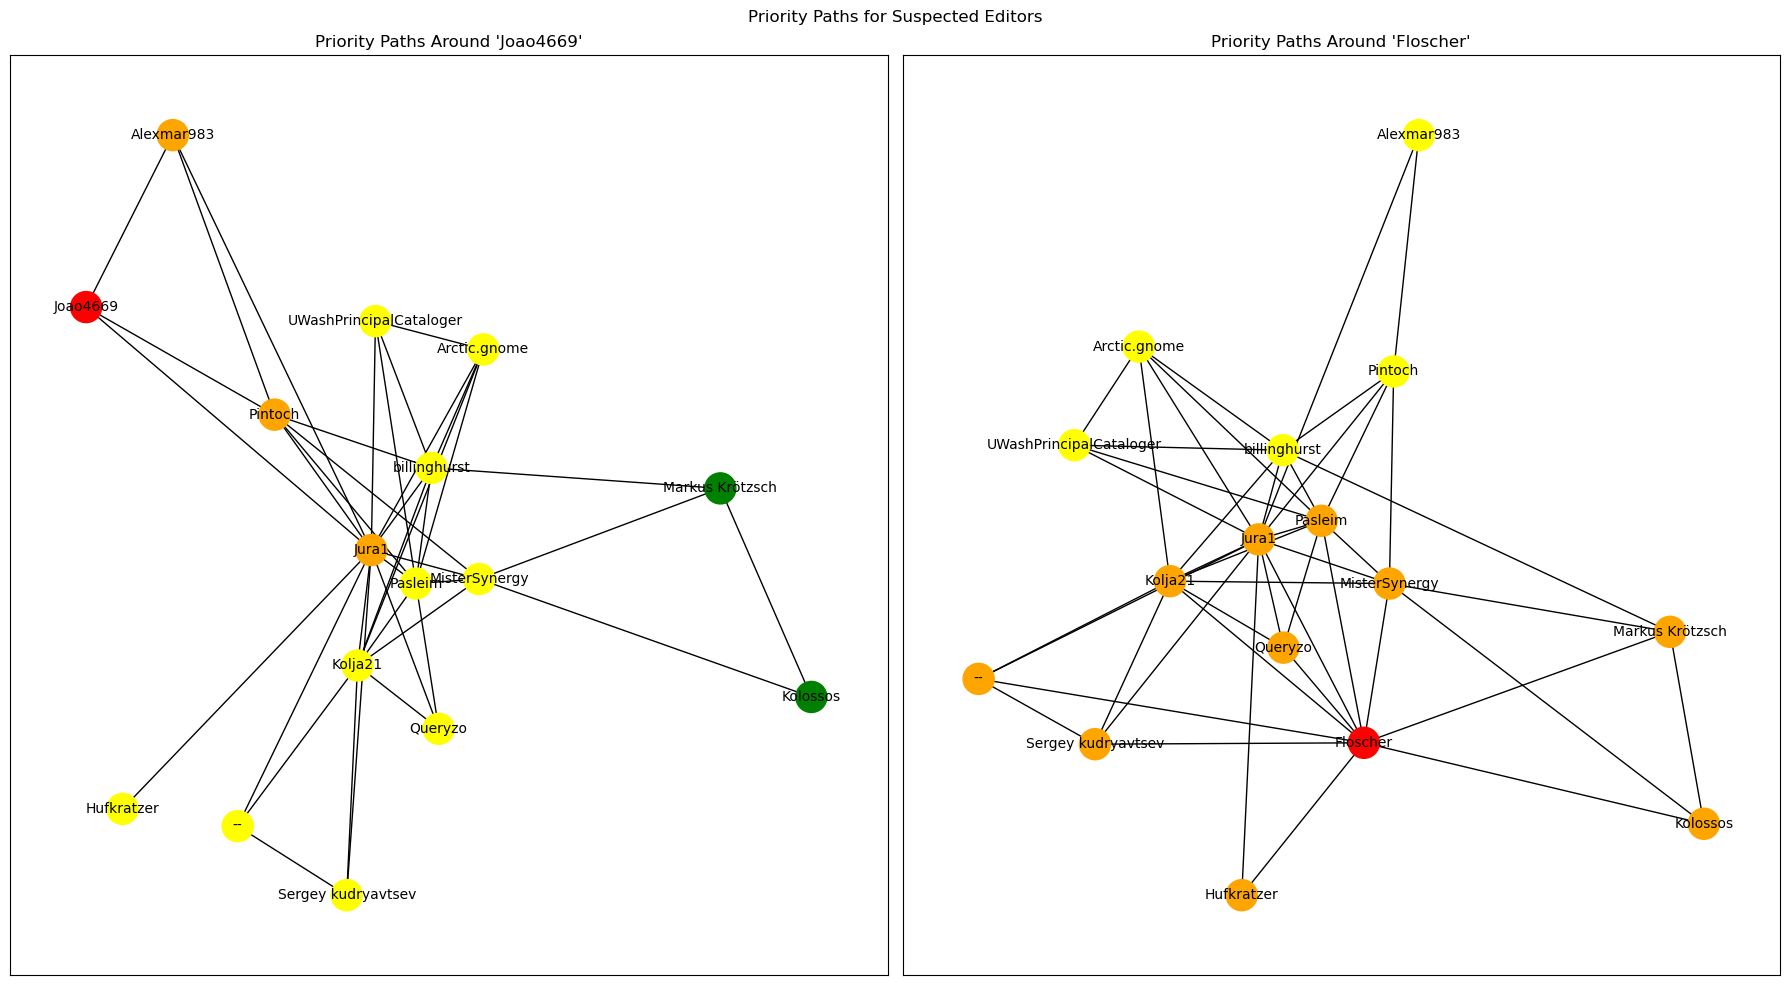

The chosen editor nodes are Jc86035 and E4024.
Graph: Graph
1: MisterSynergy with weight 22
2: Ymblanter with weight 17
3: Emu with weight 16
4: Hasley with weight 15
5: Mahir256 with weight 14
6: Bovlb with weight 11
7: Lymantria with weight 11
8: ChristianKl with weight 10
9: Pamputt with weight 10
10: ZI Jony with weight 10
11: Jasper Deng with weight 9
12: علاء with weight 9
13: Pigsonthewing with weight 9
14: DannyS712 with weight 9
15: Matěj Suchánek with weight 8




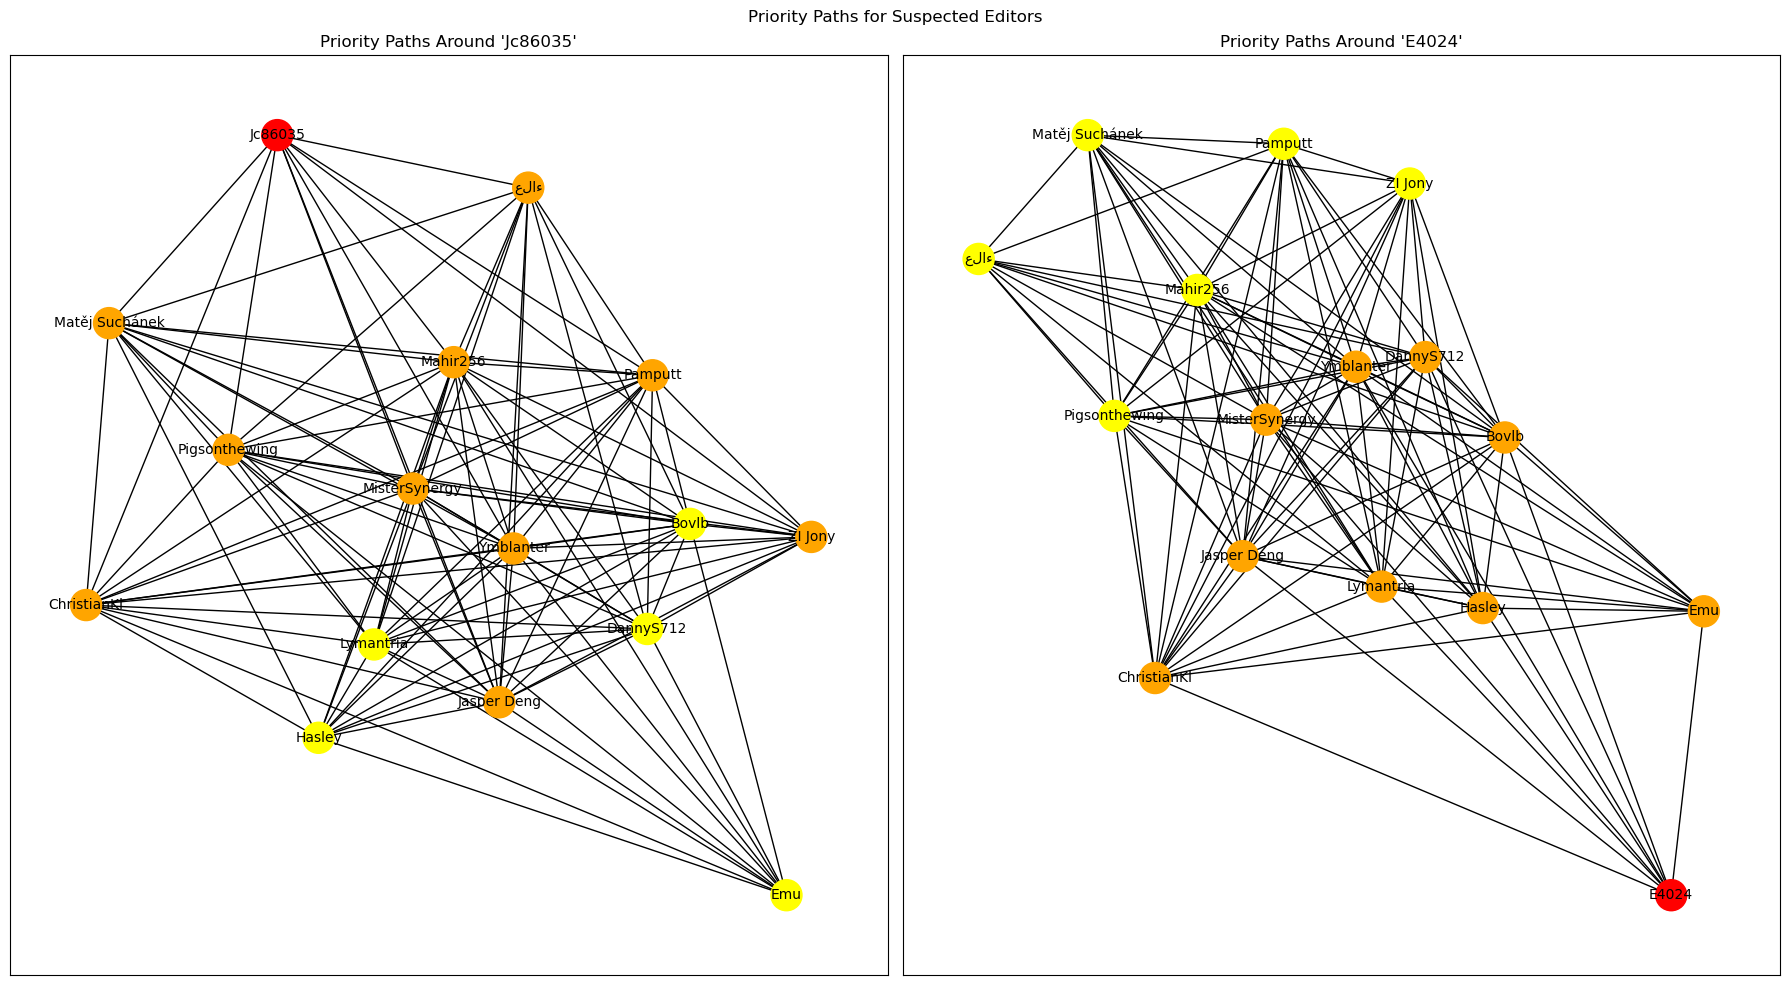

The chosen editor nodes are 84.46.53.87 and 88.70.33.10.
Graph: Graph
1: ChristianKl with weight 7
2: Jura1 with weight 7
3: Lydia Pintscher (WMDE) with weight 6
4: Ghouston with weight 6
5: MechQuester with weight 6
6: Matěj Suchánek with weight 6
7: PokestarFan with weight 6
8: Syced with weight 6
9: Palosirkka with weight 5
10: GerardM with weight 4
11: Innocent bystander with weight 4
12: Snipre with weight 4
13: Izno with weight 4
14: ArthurPSmith with weight 4
15: Thryduulf with weight 4




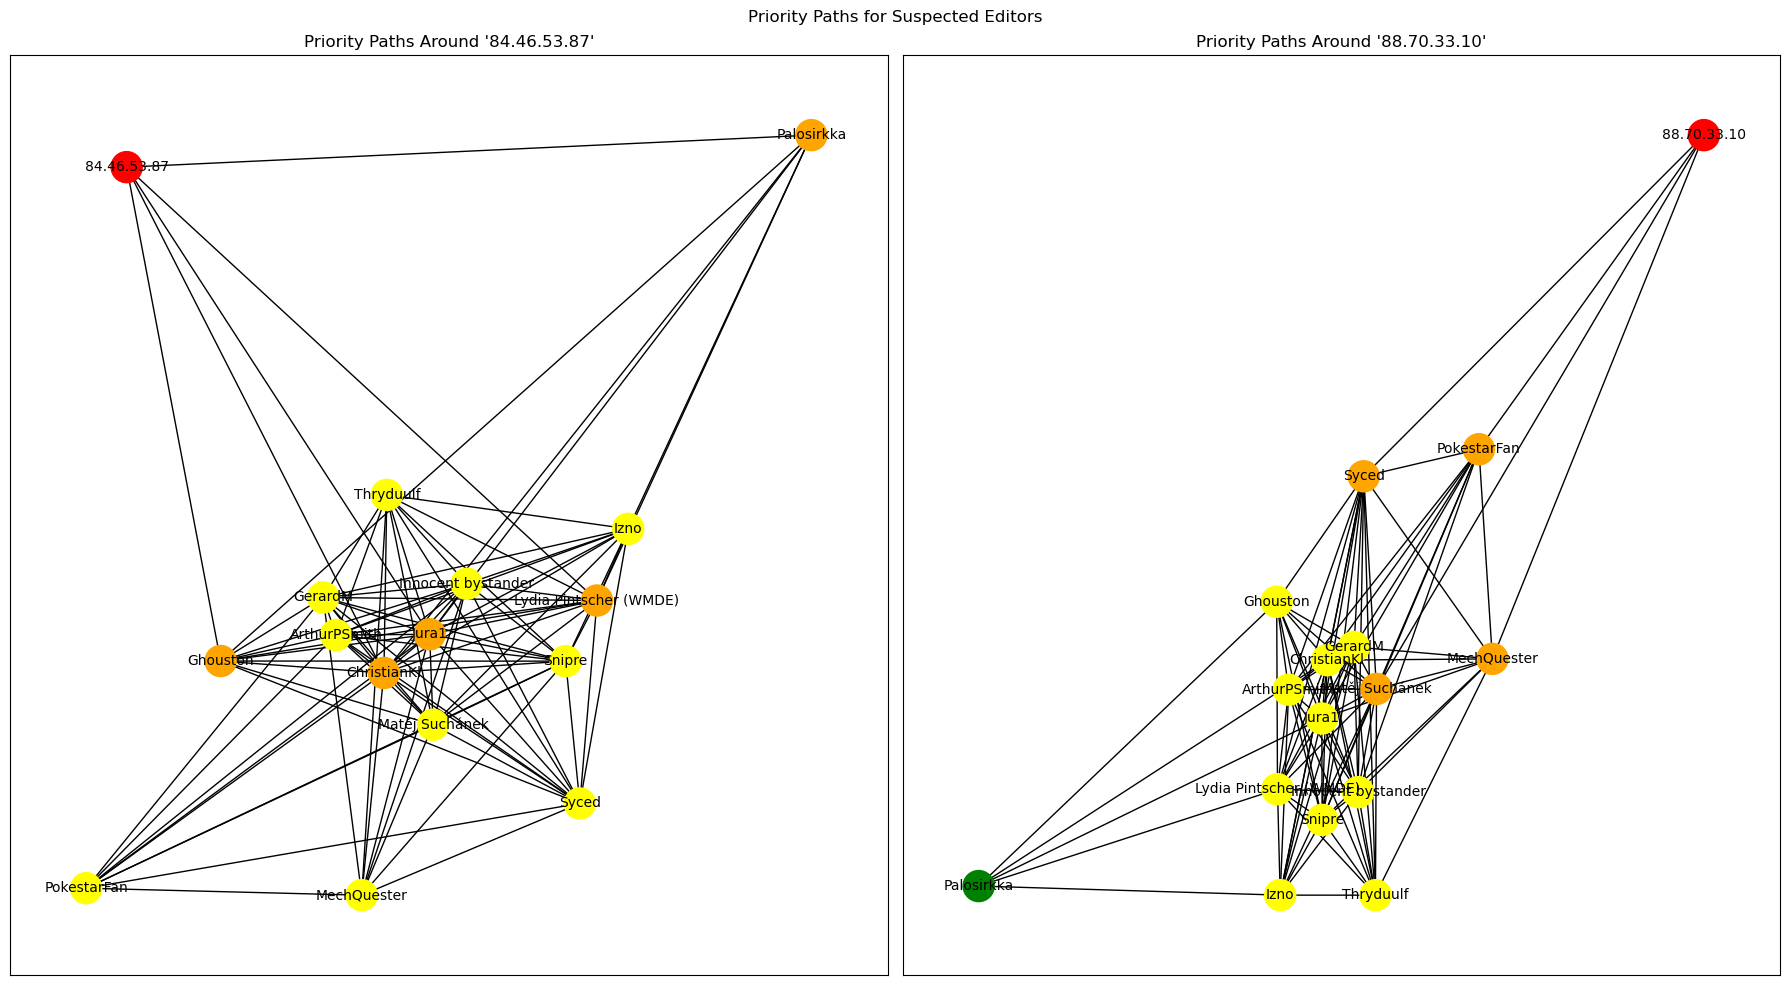

In [402]:
visualizeShortestPathPriorityList(G_small)
visualizeShortestPathPriorityList(G_medium)
visualizeShortestPathPriorityList(G_large)